In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
meals=pd.read_csv("meals_formatted.csv")  

In [3]:
meals.head()

,id,1,2,3,4,5,6,7,8,9,...,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
meals.describe()

,id,1,2,3,4,5,6,7,8,9,...,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.00000,1096.000000,1096.000000,1096.000000,...,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2835.872263,0.229015,0.007299,0.139599,0.387774,0.084854,0.75000,0.510949,0.235401,0.671533,...,0.000912,0.000912,0.000912,0.000912,0.000912,0.002737,0.002737,0.001825,0.001825,0.000912
std,3138.927619,0.420390,0.085162,0.346728,0.487465,0.278792,0.43321,0.500108,0.424443,0.469870,...,0.030206,0.030206,0.030206,0.030206,0.030206,0.052271,0.052271,0.042698,0.042698,0.030206
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,302.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.75000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,583.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7022.750000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7453.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
ids=meals['id']
meals_test=meals.drop(['id'], axis=1)

In [12]:
meals_test.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108',
       '1109'],
      dtype='object', length=1055)

In [11]:
meals_test.values.shape

(1096, 1055)

In [6]:
# 1. Elegimos la clase de modelo
from sklearn.mixture import GaussianMixture

# 2. Instanciamos el modelo con sus hiperparámetros
model = GaussianMixture(n_components=10,
            covariance_type='full')  

# 3. Ajustamos a los datos. Notar que "y" no es especificada
model.fit(meals_test)                    

# 4. Determinamos las etiquetas de los clusters
meals_predicted = model.predict(meals_test)  

In [7]:
meals_predicted.shape

(1096,)

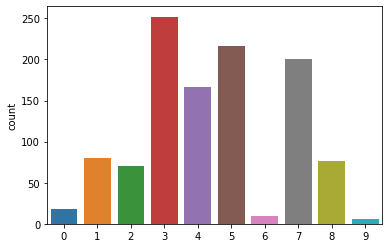

In [8]:
sns.countplot(meals_predicted, label = "id") 

In [9]:

#meals_predicted.tolist()

for index, meal_class in enumerate(meals_predicted):
    if (meal_class==5): 
        print('product id', meals.values[index][0], 'clase: ', meal_class)


product id 4.0 clase:  5
product id 5.0 clase:  5
product id 13.0 clase:  5
product id 14.0 clase:  5
product id 17.0 clase:  5
product id 18.0 clase:  5
product id 19.0 clase:  5
product id 23.0 clase:  5
product id 24.0 clase:  5
product id 29.0 clase:  5
product id 36.0 clase:  5
product id 41.0 clase:  5
product id 47.0 clase:  5
product id 48.0 clase:  5
product id 50.0 clase:  5
product id 52.0 clase:  5
product id 53.0 clase:  5
product id 62.0 clase:  5
product id 63.0 clase:  5
product id 68.0 clase:  5
product id 69.0 clase:  5
product id 74.0 clase:  5
product id 75.0 clase:  5
product id 77.0 clase:  5
product id 86.0 clase:  5
product id 98.0 clase:  5
product id 112.0 clase:  5
product id 122.0 clase:  5
product id 157.0 clase:  5
product id 162.0 clase:  5
product id 182.0 clase:  5
product id 223.0 clase:  5
product id 283.0 clase:  5
product id 288.0 clase:  5
product id 328.0 clase:  5
product id 343.0 clase:  5
product id 363.0 clase:  5
product id 364.0 clase:  5
pr

In [10]:

meals['cluster']=meals_predicted
print(meals)

        id    1    2    3    4    5    6    7    8    9  ...  1101  1102  \
0        1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   0.0   0.0   
1        2  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  ...   0.0   0.0   
2        3  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  ...   0.0   0.0   
3        4  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  ...   0.0   0.0   
4        5  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  ...   0.0   0.0   
5        6  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...   0.0   0.0   
6        7  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  ...   0.0   0.0   
7        8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   0.0   0.0   
8        9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
9       10  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  ...   0.0   0.0   
10      11  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  ...   0.0   0.0   
11      12  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  ...   0.0   0.0   
12      13  

In [13]:
# 1. Seleccionar la clase de modelo
from sklearn.decomposition import PCA  

# 2. Instanciar el modelo con hiperparámetros
model = PCA(n_components=2)            

# 3. Ajustar a los datos. Notar que no especificamos "y" 
model.fit(meals_test)                      

# 4. Transformar los datos a dos dimensiones
X_2D = model.transform(meals_test)   

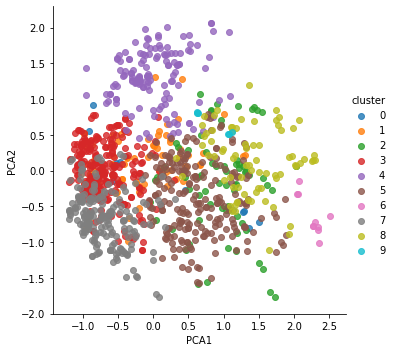

In [14]:
meals['PCA1'] = X_2D[:, 0]
meals['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='cluster', data=meals, fit_reg=False);

<Figure size 1080x1080 with 0 Axes>

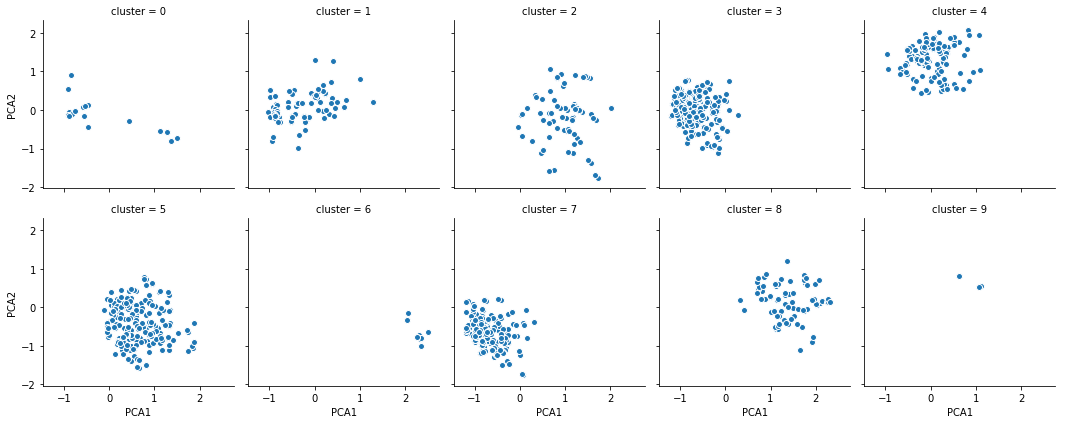

In [17]:
plt.figure(figsize=(15,15))
g = sns.FacetGrid(meals, col="cluster", col_wrap=5, height=3)
g = (g.map(plt.scatter, "PCA1", "PCA2", edgecolor="w").add_legend())

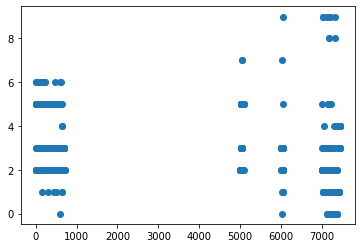

In [59]:
plt.scatter(meals_arr[:,0], meals_arr[:,1]);

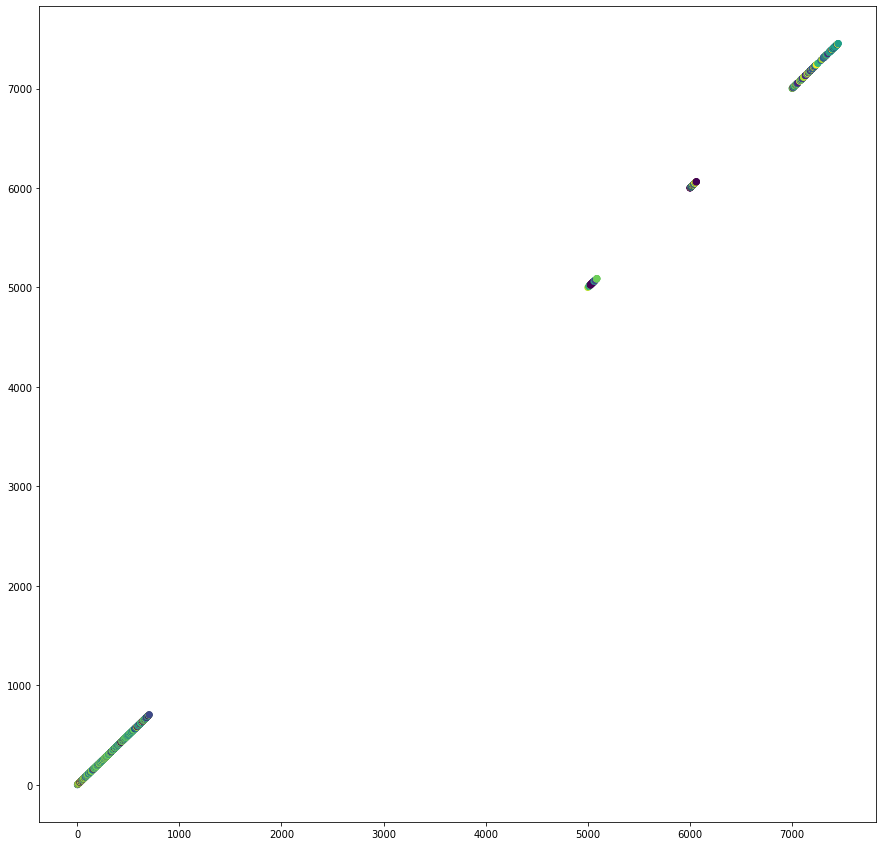

In [21]:
plt.figure(figsize=(15,15))
plt.scatter(meals_arr[:,0], meals_arr[:,0], c=meals_arr[:,1], cmap='viridis');
#plt.xlabel(meals_arr[:,0])
#plt.ylabel(meals_arr[:,0]);